<a href="https://colab.research.google.com/github/dmod99/COVID19_Predict/blob/main/data_4_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Imorting all libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC  
from sklearn.model_selection import train_test_split  
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
import statistics
import seaborn as sb

In [ ]:
#read and shuffle data
df = pd.read_csv("/content/Dataset-4.csv")
df = df.sample(frac=1,random_state=2)

In [ ]:
df.columns

Index(['Unnamed: 0', 'New_ID', 'Male', 'Female', 'Age', 'Calcium',
       'Creatinine', 'Alkaline_Phosphatase', 'Gamma_Glutamyltransferase',
       'Glucose', 'Aspartate_aminotransferase', 'Alanine_aminotransferase',
       'Lactate_dehydrogenase', 'Urea', 'Leukocytes_(10^9/L)', 'Erythrocytes',
       'Hemoglobin', 'Hematocrit', 'Mean_corpuscular_volume',
       'Mean_corpuscolar_hemoglobin', 'Mean_corpuscolar_hemoglobin_conc.',
       'Platelets_(10^9/L)', 'Neutrophils_(%)', 'Lymphocytes_(%)',
       'Monocytes_(%)', 'Eosinophils_(%)', 'Basophils_(%)',
       'Neutrophils_count_(10^9/L)', 'Lymphocytes_count_(10^9/L)',
       'Monocytes_count_(10^9/L)', 'Eosinophils_count_(10^9/L)',
       'Basophils_count_(10^9/L)', 'CoV-2'],
      dtype='object')

In [ ]:
df

,Unnamed: 0,New_ID,Male,Female,Age,Calcium,Creatinine,Alkaline_Phosphatase,Gamma_Glutamyltransferase,Glucose,Aspartate_aminotransferase,Alanine_aminotransferase,Lactate_dehydrogenase,Urea,Leukocytes_(10^9/L),Erythrocytes,Hemoglobin,Hematocrit,Mean_corpuscular_volume,Mean_corpuscolar_hemoglobin,Mean_corpuscolar_hemoglobin_conc.,Platelets_(10^9/L),Neutrophils_(%),Lymphocytes_(%),Monocytes_(%),Eosinophils_(%),Basophils_(%),Neutrophils_count_(10^9/L),Lymphocytes_count_(10^9/L),Monocytes_count_(10^9/L),Eosinophils_count_(10^9/L),Basophils_count_(10^9/L),CoV-2
468,468,Italia_0517,0,1,-0.201169,NaN,-0.411446,-0.497452,-0.400444,-0.587723,-0.431273,-0.427154,NaN,NaN,-1.191553,-0.182471,0.031618,0.068698,0.413053,0.326685,-0.114120,-1.089660,-1.995205,2.564244,-0.214437,-0.544736,-0.145905,-1.106210,0.139642,-0.780688,-0.464502,-0.410345,1
951,951,Italia_1031,1,0,1.794079,0.052259,-0.022096,0.132438,-0.348742,-0.294167,-0.589145,-0.638677,-0.489756,-0.022646,-0.048258,-0.982125,-0.213206,-0.038214,2.141838,1.502390,-0.635676,0.109724,0.434049,-0.688913,-0.806856,3.036549,0.222920,0.033276,-0.490468,-0.410897,3.004931,-0.410345,0
1390,1390,Italia_1517,1,0,0.463914,0.429429,0.177703,0.300408,0.655747,0.033926,-0.214199,0.125158,-0.541736,0.436468,0.340031,1.175561,0.864021,0.772539,-0.883536,-0.536724,0.593706,-0.723476,-0.158176,-0.066452,0.622677,0.227092,0.222920,0.200848,0.454697,0.790922,0.576328,-0.410345,0
940,940,Italia_1019,0,1,1.026676,-0.513497,-0.237263,-0.539444,-0.245339,-0.484115,0.121279,-0.544667,1.584735,NaN,0.577319,-1.051060,-0.751820,-0.946970,0.413053,0.620611,0.556452,0.268935,1.128122,-0.916089,-0.961401,-0.544736,-0.883555,0.792934,-0.385450,-0.226002,-0.464502,-0.410345,1
411,411,Italia_0451,1,0,-2.145256,0.052259,0.141841,-0.105521,-0.363514,0.292947,-0.273401,-0.521164,-0.433050,NaN,-1.083695,0.948074,0.815056,0.941817,-0.267125,-0.297909,-0.114120,-0.707555,-1.851864,2.200763,0.326467,-0.544736,-0.145905,-1.039182,0.244660,-0.595793,-0.464502,-0.410345,1
1214,1214,Italia_1315,0,1,-1.326693,0.073213,-0.611245,-0.441462,-0.134550,-0.268264,-0.559544,-0.568169,-0.652785,-0.823152,0.199816,-0.320342,0.594714,0.549804,1.596278,1.557501,0.370182,2.577484,-0.505212,0.060767,1.369640,0.196219,1.513809,-0.022581,0.507206,1.160713,0.229384,2.110581,0
1484,1484,Italia_1635,0,1,-0.559290,-0.040776,-0.626614,NaN,-0.333970,-0.432311,-0.648347,-0.709185,NaN,-0.187456,-0.101468,-1.501440,-1.257790,-1.285526,0.857057,0.571623,-0.362480,-0.010568,0.159941,0.110746,-0.617969,-0.462408,-0.637672,-0.065777,0.269164,-0.330776,-0.371984,0.009809,0
1094,1094,Italia_1179,1,0,0.924355,0.177982,0.377501,NaN,-0.393058,1.898874,-0.411539,-0.591672,NaN,NaN,1.548041,0.065697,0.178513,0.389436,0.469734,0.106240,-0.635676,0.184022,0.954604,-1.043307,-0.240195,-0.236005,0.591746,1.574935,-0.280432,0.883370,0.229384,2.110581,0
1444,1444,Italia_1588,1,0,-1.940615,0.471337,-0.022096,-0.637427,-0.415216,-0.812208,-0.332603,-0.051112,-0.744932,-0.446444,-0.522833,1.113519,1.010916,0.906179,-0.593044,-0.261168,0.630960,-0.070714,-1.912218,1.964500,0.481011,0.998921,0.960571,-0.771067,1.189825,-0.041107,0.923271,-0.410345,0
1143,1143,Italia_1236,1,0,-0.866251,-0.157280,-0.329478,-0.455459,-0.001602,-0.035146,0.002875,-0.145122,NaN,NaN,1.569613,-0.278981,-0.115276,-0.252039,0.030453,0.253203,0.481944,1.086214,1.475158,-1.243222,-1.218974,-0.544736,-0.883555,1.843049,-0.595487,-0.226002,-0.464502,-0.410345,1


In [ ]:
df['CoV-2'].value_counts()

1    788
0    744
Name: CoV-2, dtype: int64

In [ ]:
df.shape

(1532, 33)

In [ ]:
#dropping id column as it is not a valid attribute to train model
df = df.drop(['Unnamed: 0'], axis = 1)
df = df.drop(['New_ID'], axis = 1)

In [ ]:
df

,Male,Female,Age,Calcium,Creatinine,Alkaline_Phosphatase,Gamma_Glutamyltransferase,Glucose,Aspartate_aminotransferase,Alanine_aminotransferase,Lactate_dehydrogenase,Urea,Leukocytes_(10^9/L),Erythrocytes,Hemoglobin,Hematocrit,Mean_corpuscular_volume,Mean_corpuscolar_hemoglobin,Mean_corpuscolar_hemoglobin_conc.,Platelets_(10^9/L),Neutrophils_(%),Lymphocytes_(%),Monocytes_(%),Eosinophils_(%),Basophils_(%),Neutrophils_count_(10^9/L),Lymphocytes_count_(10^9/L),Monocytes_count_(10^9/L),Eosinophils_count_(10^9/L),Basophils_count_(10^9/L),CoV-2
468,0,1,-0.201169,NaN,-0.411446,-0.497452,-0.400444,-0.587723,-0.431273,-0.427154,NaN,NaN,-1.191553,-0.182471,0.031618,0.068698,0.413053,0.326685,-0.114120,-1.089660,-1.995205,2.564244,-0.214437,-0.544736,-0.145905,-1.106210,0.139642,-0.780688,-0.464502,-0.410345,1
951,1,0,1.794079,0.052259,-0.022096,0.132438,-0.348742,-0.294167,-0.589145,-0.638677,-0.489756,-0.022646,-0.048258,-0.982125,-0.213206,-0.038214,2.141838,1.502390,-0.635676,0.109724,0.434049,-0.688913,-0.806856,3.036549,0.222920,0.033276,-0.490468,-0.410897,3.004931,-0.410345,0
1390,1,0,0.463914,0.429429,0.177703,0.300408,0.655747,0.033926,-0.214199,0.125158,-0.541736,0.436468,0.340031,1.175561,0.864021,0.772539,-0.883536,-0.536724,0.593706,-0.723476,-0.158176,-0.066452,0.622677,0.227092,0.222920,0.200848,0.454697,0.790922,0.576328,-0.410345,0
940,0,1,1.026676,-0.513497,-0.237263,-0.539444,-0.245339,-0.484115,0.121279,-0.544667,1.584735,NaN,0.577319,-1.051060,-0.751820,-0.946970,0.413053,0.620611,0.556452,0.268935,1.128122,-0.916089,-0.961401,-0.544736,-0.883555,0.792934,-0.385450,-0.226002,-0.464502,-0.410345,1
411,1,0,-2.145256,0.052259,0.141841,-0.105521,-0.363514,0.292947,-0.273401,-0.521164,-0.433050,NaN,-1.083695,0.948074,0.815056,0.941817,-0.267125,-0.297909,-0.114120,-0.707555,-1.851864,2.200763,0.326467,-0.544736,-0.145905,-1.039182,0.244660,-0.595793,-0.464502,-0.410345,1
1214,0,1,-1.326693,0.073213,-0.611245,-0.441462,-0.134550,-0.268264,-0.559544,-0.568169,-0.652785,-0.823152,0.199816,-0.320342,0.594714,0.549804,1.596278,1.557501,0.370182,2.577484,-0.505212,0.060767,1.369640,0.196219,1.513809,-0.022581,0.507206,1.160713,0.229384,2.110581,0
1484,0,1,-0.559290,-0.040776,-0.626614,NaN,-0.333970,-0.432311,-0.648347,-0.709185,NaN,-0.187456,-0.101468,-1.501440,-1.257790,-1.285526,0.857057,0.571623,-0.362480,-0.010568,0.159941,0.110746,-0.617969,-0.462408,-0.637672,-0.065777,0.269164,-0.330776,-0.371984,0.009809,0
1094,1,0,0.924355,0.177982,0.377501,NaN,-0.393058,1.898874,-0.411539,-0.591672,NaN,NaN,1.548041,0.065697,0.178513,0.389436,0.469734,0.106240,-0.635676,0.184022,0.954604,-1.043307,-0.240195,-0.236005,0.591746,1.574935,-0.280432,0.883370,0.229384,2.110581,0
1444,1,0,-1.940615,0.471337,-0.022096,-0.637427,-0.415216,-0.812208,-0.332603,-0.051112,-0.744932,-0.446444,-0.522833,1.113519,1.010916,0.906179,-0.593044,-0.261168,0.630960,-0.070714,-1.912218,1.964500,0.481011,0.998921,0.960571,-0.771067,1.189825,-0.041107,0.923271,-0.410345,0
1143,1,0,-0.866251,-0.157280,-0.329478,-0.455459,-0.001602,-0.035146,0.002875,-0.145122,NaN,NaN,1.569613,-0.278981,-0.115276,-0.252039,0.030453,0.253203,0.481944,1.086214,1.475158,-1.243222,-1.218974,-0.544736,-0.883555,1.843049,-0.595487,-0.226002,-0.464502,-0.410345,1


In [ ]:
corrM=df.corr(method='pearson')
corrM

,Male,Female,Age,Calcium,Creatinine,Alkaline_Phosphatase,Gamma_Glutamyltransferase,Glucose,Aspartate_aminotransferase,Alanine_aminotransferase,Lactate_dehydrogenase,Urea,Leukocytes_(10^9/L),Erythrocytes,Hemoglobin,Hematocrit,Mean_corpuscular_volume,Mean_corpuscolar_hemoglobin,Mean_corpuscolar_hemoglobin_conc.,Platelets_(10^9/L),Neutrophils_(%),Lymphocytes_(%),Monocytes_(%),Eosinophils_(%),Basophils_(%),Neutrophils_count_(10^9/L),Lymphocytes_count_(10^9/L),Monocytes_count_(10^9/L),Eosinophils_count_(10^9/L),Basophils_count_(10^9/L),CoV-2
Male,1.000000,-1.000000,-0.005237,-0.077201,0.170451,-0.027757,0.082659,0.070567,0.076020,0.100338,0.052752,0.092306,0.016019,0.189315,0.262525,0.230341,0.033522,0.112106,0.195279,-0.144832,0.152454,-0.181196,0.020446,-0.054784,-0.066588,0.053995,-0.144022,0.000373,-0.065848,-0.048532,0.118518
Female,-1.000000,1.000000,0.005237,0.077201,-0.170451,0.027757,-0.082659,-0.070567,-0.076020,-0.100338,-0.052752,-0.092306,-0.016019,-0.189315,-0.262525,-0.230341,-0.033522,-0.112106,-0.195279,0.144832,-0.152454,0.181196,-0.020446,0.054784,0.066588,-0.053995,0.144022,-0.000373,0.065848,0.048532,-0.118518
Age,-0.005237,0.005237,1.000000,-0.057574,0.246030,0.075427,0.059908,0.224005,0.094622,-0.049544,0.150478,0.461203,0.159203,-0.346348,-0.272628,-0.222276,0.304684,0.150300,-0.257553,-0.084161,0.353986,-0.386340,-0.050195,-0.142566,-0.118002,0.241652,-0.268100,0.089557,-0.104200,0.013816,0.044709
Calcium,-0.077201,0.077201,-0.057574,1.000000,-0.023755,-0.024019,-0.045148,-0.048895,-0.076386,-0.051948,-0.239356,-0.017354,0.030704,0.029210,0.022997,0.027526,-0.013981,-0.017862,-0.011299,0.056174,-0.090533,0.074352,0.042810,0.119775,0.094352,-0.003535,0.100086,0.041586,0.126216,0.059714,-0.151657
Creatinine,0.170451,-0.170451,0.246030,-0.023755,1.000000,0.021011,0.042136,0.133216,0.107978,-0.018358,0.058373,0.757900,0.122186,-0.248863,-0.218490,-0.199644,0.165301,0.076698,-0.143407,-0.089759,0.187297,-0.200091,-0.057868,-0.031956,-0.060428,0.159427,-0.132334,0.032807,-0.022689,0.020992,-0.034024
Alkaline_Phosphatase,-0.027757,0.027757,0.075427,-0.024019,0.021011,1.000000,0.571479,0.074828,0.216134,0.301291,0.099406,0.052151,0.254933,-0.177785,-0.208338,-0.194725,0.016115,-0.041387,-0.127071,0.109582,0.097095,-0.116359,-0.013728,0.025629,0.004469,0.278562,0.011033,0.104161,0.043709,0.103488,-0.094851
Gamma_Glutamyltransferase,0.082659,-0.082659,0.059908,-0.045148,0.042136,0.571479,1.000000,0.060225,0.328460,0.380517,0.100235,0.062525,0.068969,-0.086519,-0.045488,-0.049852,0.098572,0.081474,-0.005313,-0.006141,0.081717,-0.076894,-0.034884,-0.054250,-0.057513,0.099672,-0.070855,-0.004520,-0.054696,-0.007813,0.047776
Glucose,0.070567,-0.070567,0.224005,-0.048895,0.133216,0.074828,0.060225,1.000000,0.248623,0.126461,0.168041,0.248987,0.172065,-0.070204,-0.063713,-0.043094,0.058757,0.009509,-0.093185,0.074467,0.247069,-0.235595,-0.124085,-0.109292,-0.138514,0.209157,-0.098515,0.052344,-0.072799,-0.038401,0.105549
Aspartate_aminotransferase,0.076020,-0.076020,0.094622,-0.076386,0.107978,0.216134,0.328460,0.248623,1.000000,0.764785,0.411740,0.209776,0.096484,-0.006501,-0.002468,-0.000757,0.012798,0.004109,-0.016952,-0.018118,0.179291,-0.158161,-0.104260,-0.127273,-0.134398,0.145380,-0.093714,0.003241,-0.115063,-0.056892,0.219371
Alanine_aminotransferase,0.100338,-0.100338,-0.049544,-0.051948,-0.018358,0.301291,0.380517,0.126461,0.764785,1.000000,0.235572,0.015099,0.059507,0.063292,0.076230,0.065210,-0.015078,0.010086,0.052070,0.038250,0.085854,-0.072650,-0.064321,-0.048670,-0.035454,0.091983,-0.053886,-0.025216,-0.054502,-0.011329,0.165354


In [ ]:
corrMat=corrM.iloc[30,0:30]
corrMat

Male                                 0.118518
Female                              -0.118518
Age                                  0.044709
Calcium                             -0.151657
Creatinine                          -0.034024
Alkaline_Phosphatase                -0.094851
Gamma_Glutamyltransferase            0.047776
Glucose                              0.105549
Aspartate_aminotransferase           0.219371
Alanine_aminotransferase             0.165354
Lactate_dehydrogenase                0.273908
Urea                                 0.006127
Leukocytes_(10^9/L)                 -0.228350
Erythrocytes                         0.153935
Hemoglobin                           0.160247
Hematocrit                           0.149212
Mean_corpuscular_volume             -0.051323
Mean_corpuscolar_hemoglobin         -0.001015
Mean_corpuscolar_hemoglobin_conc.    0.101262
Platelets_(10^9/L)                  -0.115611
Neutrophils_(%)                      0.136140
Lymphocytes_(%)                   

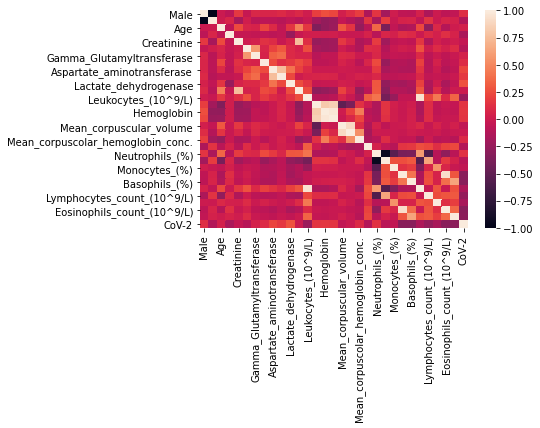

In [ ]:
sb.heatmap(corrM)
plt.show()

In [ ]:
df.isnull().any()

Male                                 False
Female                               False
Age                                   True
Calcium                               True
Creatinine                            True
Alkaline_Phosphatase                  True
Gamma_Glutamyltransferase             True
Glucose                               True
Aspartate_aminotransferase            True
Alanine_aminotransferase              True
Lactate_dehydrogenase                 True
Urea                                  True
Leukocytes_(10^9/L)                  False
Erythrocytes                         False
Hemoglobin                           False
Hematocrit                           False
Mean_corpuscular_volume              False
Mean_corpuscolar_hemoglobin          False
Mean_corpuscolar_hemoglobin_conc.    False
Platelets_(10^9/L)                   False
Neutrophils_(%)                       True
Lymphocytes_(%)                       True
Monocytes_(%)                         True
Eosinophils

In [ ]:
#df = df.fillna(lambda x: x.median())

In [ ]:
data = df.to_numpy()

data.shape

(1532, 31)

In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(data)
#X_2 = X
SimpleImputer()
data = imp.transform(data)

data

array([[ 0.        ,  1.        , -0.20116868, ..., -0.46450233,
        -0.41034507,  1.        ],
       [ 1.        ,  0.        ,  1.79407858, ...,  3.00493149,
        -0.41034507,  0.        ],
       [ 1.        ,  0.        ,  0.46391374, ...,  0.57632782,
        -0.41034507,  0.        ],
       ...,
       [ 1.        ,  0.        , -0.04768812, ..., -0.46450233,
        -0.41034507,  1.        ],
       [ 0.        ,  1.        ,  0.66855449, ..., -0.46450233,
        -0.41034507,  1.        ],
       [ 1.        ,  0.        ,  0.51507393, ..., -0.46450233,
        -0.41034507,  1.        ]])

In [ ]:
#splitting into 7 folds
data_g = np.array_split(data, 7)

## **LOGISTIC REGRESSION**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8544533558463486
----------------------TESTING-----------------------
                precision    recall  f1-score   support

Covid Negative       0.78      0.74      0.76       103
Covid Positive       0.78      0.82      0.80       115

      accuracy                           0.78       218
     macro avg       0.78      0.78      0.78       218
  weighted avg       0.78      0.78      0.78       218

------------------TRAINING-----------------
                precision    recall  f1-score   support

Covid Negative       0.80      0.82      0.81       641
Covid Positive       0.82      0.80      0.81       673

      accuracy                           0.81      1314
     macro avg       0.81      0.81      0.81      1314
  weighted avg       0.81      0.81      0.81      1314



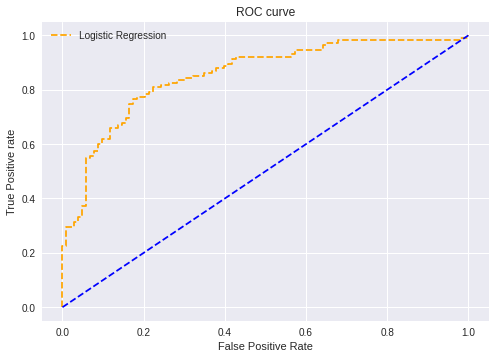

In [ ]:
accuracy_log_test = []
accuracy_log_train = []
classif_log_test=[]
classif_log_train=[]

for i in range(7):
  if i == 6:
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:30])
                train_data_y.append(data_g[j][w][30])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:30])
                test_data_y.append(data_g[j][w][30])
                
    #convert into array
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn 
    clf = LogisticRegression(random_state = 0)
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    pred_prob1 = clf.predict_proba(test_data_xn)
    arr_2d = np.reshape(test_data_yn, (218, 1))
    new_np = np.hstack((test_data_xn,arr_2d))
    finaltocsv= np.hstack((new_np,pred_prob1))
    finaldf = pd.DataFrame(finaltocsv)
    finaldf.to_csv("Dataset4-logistic-regression-test-results.csv")

    from sklearn.metrics import roc_curve

    # roc curve for models
    fpr1, tpr1, thresh1 = roc_curve(test_data_yn, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(test_data_yn))]
    p_fpr, p_tpr, _ = roc_curve(test_data_yn, random_probs, pos_label=1)
    
    from sklearn.metrics import roc_auc_score
    auc_score1 = roc_auc_score(test_data_yn, pred_prob1[:,1])
    print(auc_score1)

    # matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    #calculating and appending accuracies
    acc1_log = accuracy_score(test_data_yn, test_pred_y_log)
    accuracy_log_test.append(acc1_log)
    print("----------------------TESTING-----------------------")
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(test_data_yn, test_pred_y_log, target_names=target_names))
    print("------------------TRAINING-----------------")
    acc2_log = accuracy_score(train_data_yn, train_pred_y_log)
    accuracy_log_train.append(acc2_log)
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(train_data_yn, train_pred_y_log, target_names=target_names))


In [ ]:
#Creating the Confusion matrix
cm= confusion_matrix(test_data_yn, test_pred_y_log)
cm

array([[76, 27],
       [21, 94]])

In [ ]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(accuracy_log_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_log_train))


Mean accuracy for test set =  0.7798165137614679
Mean accuracy for train set =  0.8097412480974124


# **NAIVE BAYES**

0.8195863233431828
----------------------TESTING-----------------------
                precision    recall  f1-score   support

Covid Negative       0.83      0.43      0.56       103
Covid Positive       0.64      0.92      0.76       115

      accuracy                           0.69       218
     macro avg       0.74      0.67      0.66       218
  weighted avg       0.73      0.69      0.67       218



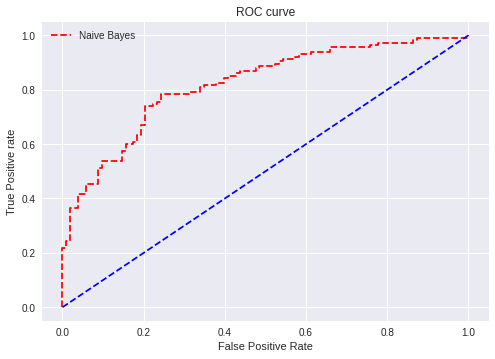

In [ ]:
accuracy_nb_test = []
accuracy_nb_train = []

for i in range(7):
  if i == 6:
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:30])
                train_data_y.append(data_g[j][w][30])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:30])
                test_data_y.append(data_g[j][w][30])
       
    #convert into array         
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = GaussianNB()
    clf.fit(train_data_xn, train_data_yn)

    
    #predict class
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    pred_prob1 = clf.predict_proba(test_data_xn)
    arr_2d = np.reshape(test_data_yn, (218, 1))
    new_np = np.hstack((test_data_xn,arr_2d))
    finaltocsv= np.hstack((new_np,pred_prob1))
    finaldf = pd.DataFrame(finaltocsv)
    finaldf.to_csv("Dataset4-Naive-Bayes-test-results.csv")
    from sklearn.metrics import roc_curve

    # roc curve for models
    fpr2, tpr2, thresh2 = roc_curve(test_data_yn, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(test_data_yn))]
    p_fpr, p_tpr, _ = roc_curve(test_data_yn, random_probs, pos_label=1)
    
    from sklearn.metrics import roc_auc_score
    auc_score1 = roc_auc_score(test_data_yn, pred_prob1[:,1])
    print(auc_score1)

    # matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    #predict class
    test_pred_y_nb = clf.predict(test_data_xn)
    train_pred_y_nb = clf.predict(train_data_xn)

    #calculating and appending accuracies
    acc1_nb = accuracy_score(test_data_yn, test_pred_y_nb)
    accuracy_nb_test.append(acc1_nb)
    
    acc2_nb = accuracy_score(train_data_yn, train_pred_y_nb)
    accuracy_nb_train.append(acc2_nb)
    print("----------------------TESTING-----------------------")
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(test_data_yn, test_pred_y_log, target_names=target_names))

In [ ]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(accuracy_nb_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_nb_train))

Mean accuracy for test set =  0.6880733944954128
Mean accuracy for train set =  0.6605783866057838


# ***Fisher Linear Discriminant***

0.8749683410721824


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


----------------------TESTING-----------------------
                precision    recall  f1-score   support

Covid Negative       0.83      0.76      0.79       103
Covid Positive       0.80      0.86      0.83       115

      accuracy                           0.81       218
     macro avg       0.81      0.81      0.81       218
  weighted avg       0.81      0.81      0.81       218



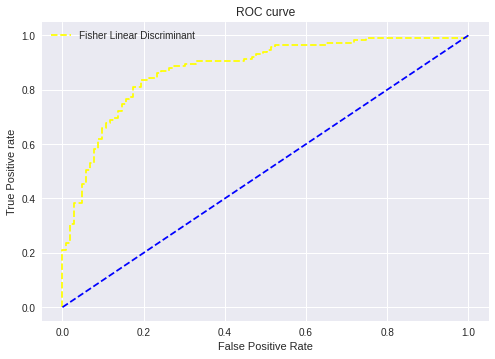

In [ ]:
accuracy_fl_test = []
accuracy_fl_train = []

for i in range(7):
  if i == 6:
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:30])
                train_data_y.append(data_g[j][w][30])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:30])
                test_data_y.append(data_g[j][w][30])
                
    #convert into array
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = LinearDiscriminantAnalysis()
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    pred_prob1 = clf.predict_proba(test_data_xn)

    from sklearn.metrics import roc_curve
    arr_2d = np.reshape(test_data_yn, (218, 1))
    new_np = np.hstack((test_data_xn,arr_2d))
    finaltocsv= np.hstack((new_np,pred_prob1))
    finaldf = pd.DataFrame(finaltocsv)
    finaldf.to_csv("Dataset4-Fischer's-Linear-Discriminant-test-results.csv")
    # roc curve for models
    fpr3, tpr3, thresh3 = roc_curve(test_data_yn, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(test_data_yn))]
    p_fpr, p_tpr, _ = roc_curve(test_data_yn, random_probs, pos_label=1)
    
    from sklearn.metrics import roc_auc_score
    auc_score1 = roc_auc_score(test_data_yn, pred_prob1[:,1])
    print(auc_score1)

    # matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='Fisher Linear Discriminant')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    #predict class
    test_pred_y_fl = clf.predict(test_data_xn)
    train_pred_y_fl = clf.predict(train_data_xn)
    
    #calculating and appending accuracies
    acc1_fl = accuracy_score(test_data_yn, test_pred_y_fl)
    accuracy_fl_test.append(acc1_fl)
    
    acc2_fl = accuracy_score(train_data_yn, train_pred_y_fl)
    accuracy_fl_train.append(acc2_fl)
    print("----------------------TESTING-----------------------")
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(test_data_yn, test_pred_y_log, target_names=target_names))

In [ ]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(accuracy_fl_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_fl_train))

Mean accuracy for test set =  0.8119266055045872
Mean accuracy for train set =  0.7960426179604262


# **KNN**

In [ ]:
df

,Male,Female,Age,Calcium,Creatinine,Alkaline_Phosphatase,Gamma_Glutamyltransferase,Glucose,Aspartate_aminotransferase,Alanine_aminotransferase,Lactate_dehydrogenase,Urea,Leukocytes_(10^9/L),Erythrocytes,Hemoglobin,Hematocrit,Mean_corpuscular_volume,Mean_corpuscolar_hemoglobin,Mean_corpuscolar_hemoglobin_conc.,Platelets_(10^9/L),Neutrophils_(%),Lymphocytes_(%),Monocytes_(%),Eosinophils_(%),Basophils_(%),Neutrophils_count_(10^9/L),Lymphocytes_count_(10^9/L),Monocytes_count_(10^9/L),Eosinophils_count_(10^9/L),Basophils_count_(10^9/L),CoV-2
468,0,1,-0.201169,NaN,-0.411446,-0.497452,-0.400444,-0.587723,-0.431273,-0.427154,NaN,NaN,-1.191553,-0.182471,0.031618,0.068698,0.413053,0.326685,-0.114120,-1.089660,-1.995205,2.564244,-0.214437,-0.544736,-0.145905,-1.106210,0.139642,-0.780688,-0.464502,-0.410345,1
951,1,0,1.794079,0.052259,-0.022096,0.132438,-0.348742,-0.294167,-0.589145,-0.638677,-0.489756,-0.022646,-0.048258,-0.982125,-0.213206,-0.038214,2.141838,1.502390,-0.635676,0.109724,0.434049,-0.688913,-0.806856,3.036549,0.222920,0.033276,-0.490468,-0.410897,3.004931,-0.410345,0
1390,1,0,0.463914,0.429429,0.177703,0.300408,0.655747,0.033926,-0.214199,0.125158,-0.541736,0.436468,0.340031,1.175561,0.864021,0.772539,-0.883536,-0.536724,0.593706,-0.723476,-0.158176,-0.066452,0.622677,0.227092,0.222920,0.200848,0.454697,0.790922,0.576328,-0.410345,0
940,0,1,1.026676,-0.513497,-0.237263,-0.539444,-0.245339,-0.484115,0.121279,-0.544667,1.584735,NaN,0.577319,-1.051060,-0.751820,-0.946970,0.413053,0.620611,0.556452,0.268935,1.128122,-0.916089,-0.961401,-0.544736,-0.883555,0.792934,-0.385450,-0.226002,-0.464502,-0.410345,1
411,1,0,-2.145256,0.052259,0.141841,-0.105521,-0.363514,0.292947,-0.273401,-0.521164,-0.433050,NaN,-1.083695,0.948074,0.815056,0.941817,-0.267125,-0.297909,-0.114120,-0.707555,-1.851864,2.200763,0.326467,-0.544736,-0.145905,-1.039182,0.244660,-0.595793,-0.464502,-0.410345,1
1214,0,1,-1.326693,0.073213,-0.611245,-0.441462,-0.134550,-0.268264,-0.559544,-0.568169,-0.652785,-0.823152,0.199816,-0.320342,0.594714,0.549804,1.596278,1.557501,0.370182,2.577484,-0.505212,0.060767,1.369640,0.196219,1.513809,-0.022581,0.507206,1.160713,0.229384,2.110581,0
1484,0,1,-0.559290,-0.040776,-0.626614,NaN,-0.333970,-0.432311,-0.648347,-0.709185,NaN,-0.187456,-0.101468,-1.501440,-1.257790,-1.285526,0.857057,0.571623,-0.362480,-0.010568,0.159941,0.110746,-0.617969,-0.462408,-0.637672,-0.065777,0.269164,-0.330776,-0.371984,0.009809,0
1094,1,0,0.924355,0.177982,0.377501,NaN,-0.393058,1.898874,-0.411539,-0.591672,NaN,NaN,1.548041,0.065697,0.178513,0.389436,0.469734,0.106240,-0.635676,0.184022,0.954604,-1.043307,-0.240195,-0.236005,0.591746,1.574935,-0.280432,0.883370,0.229384,2.110581,0
1444,1,0,-1.940615,0.471337,-0.022096,-0.637427,-0.415216,-0.812208,-0.332603,-0.051112,-0.744932,-0.446444,-0.522833,1.113519,1.010916,0.906179,-0.593044,-0.261168,0.630960,-0.070714,-1.912218,1.964500,0.481011,0.998921,0.960571,-0.771067,1.189825,-0.041107,0.923271,-0.410345,0
1143,1,0,-0.866251,-0.157280,-0.329478,-0.455459,-0.001602,-0.035146,0.002875,-0.145122,NaN,NaN,1.569613,-0.278981,-0.115276,-0.252039,0.030453,0.253203,0.481944,1.086214,1.475158,-1.243222,-1.218974,-0.544736,-0.883555,1.843049,-0.595487,-0.226002,-0.464502,-0.410345,1


In [ ]:
y=df[['CoV-2']] 
y

,CoV-2
468,1
951,0
1390,0
940,1
411,1
1214,0
1484,0
1094,0
1444,0
1143,1


In [ ]:
x=df.drop(['CoV-2'], axis = 1)
x

,Male,Female,Age,Calcium,Creatinine,Alkaline_Phosphatase,Gamma_Glutamyltransferase,Glucose,Aspartate_aminotransferase,Alanine_aminotransferase,Lactate_dehydrogenase,Urea,Leukocytes_(10^9/L),Erythrocytes,Hemoglobin,Hematocrit,Mean_corpuscular_volume,Mean_corpuscolar_hemoglobin,Mean_corpuscolar_hemoglobin_conc.,Platelets_(10^9/L),Neutrophils_(%),Lymphocytes_(%),Monocytes_(%),Eosinophils_(%),Basophils_(%),Neutrophils_count_(10^9/L),Lymphocytes_count_(10^9/L),Monocytes_count_(10^9/L),Eosinophils_count_(10^9/L),Basophils_count_(10^9/L)
468,0,1,-0.201169,NaN,-0.411446,-0.497452,-0.400444,-0.587723,-0.431273,-0.427154,NaN,NaN,-1.191553,-0.182471,0.031618,0.068698,0.413053,0.326685,-0.114120,-1.089660,-1.995205,2.564244,-0.214437,-0.544736,-0.145905,-1.106210,0.139642,-0.780688,-0.464502,-0.410345
951,1,0,1.794079,0.052259,-0.022096,0.132438,-0.348742,-0.294167,-0.589145,-0.638677,-0.489756,-0.022646,-0.048258,-0.982125,-0.213206,-0.038214,2.141838,1.502390,-0.635676,0.109724,0.434049,-0.688913,-0.806856,3.036549,0.222920,0.033276,-0.490468,-0.410897,3.004931,-0.410345
1390,1,0,0.463914,0.429429,0.177703,0.300408,0.655747,0.033926,-0.214199,0.125158,-0.541736,0.436468,0.340031,1.175561,0.864021,0.772539,-0.883536,-0.536724,0.593706,-0.723476,-0.158176,-0.066452,0.622677,0.227092,0.222920,0.200848,0.454697,0.790922,0.576328,-0.410345
940,0,1,1.026676,-0.513497,-0.237263,-0.539444,-0.245339,-0.484115,0.121279,-0.544667,1.584735,NaN,0.577319,-1.051060,-0.751820,-0.946970,0.413053,0.620611,0.556452,0.268935,1.128122,-0.916089,-0.961401,-0.544736,-0.883555,0.792934,-0.385450,-0.226002,-0.464502,-0.410345
411,1,0,-2.145256,0.052259,0.141841,-0.105521,-0.363514,0.292947,-0.273401,-0.521164,-0.433050,NaN,-1.083695,0.948074,0.815056,0.941817,-0.267125,-0.297909,-0.114120,-0.707555,-1.851864,2.200763,0.326467,-0.544736,-0.145905,-1.039182,0.244660,-0.595793,-0.464502,-0.410345
1214,0,1,-1.326693,0.073213,-0.611245,-0.441462,-0.134550,-0.268264,-0.559544,-0.568169,-0.652785,-0.823152,0.199816,-0.320342,0.594714,0.549804,1.596278,1.557501,0.370182,2.577484,-0.505212,0.060767,1.369640,0.196219,1.513809,-0.022581,0.507206,1.160713,0.229384,2.110581
1484,0,1,-0.559290,-0.040776,-0.626614,NaN,-0.333970,-0.432311,-0.648347,-0.709185,NaN,-0.187456,-0.101468,-1.501440,-1.257790,-1.285526,0.857057,0.571623,-0.362480,-0.010568,0.159941,0.110746,-0.617969,-0.462408,-0.637672,-0.065777,0.269164,-0.330776,-0.371984,0.009809
1094,1,0,0.924355,0.177982,0.377501,NaN,-0.393058,1.898874,-0.411539,-0.591672,NaN,NaN,1.548041,0.065697,0.178513,0.389436,0.469734,0.106240,-0.635676,0.184022,0.954604,-1.043307,-0.240195,-0.236005,0.591746,1.574935,-0.280432,0.883370,0.229384,2.110581
1444,1,0,-1.940615,0.471337,-0.022096,-0.637427,-0.415216,-0.812208,-0.332603,-0.051112,-0.744932,-0.446444,-0.522833,1.113519,1.010916,0.906179,-0.593044,-0.261168,0.630960,-0.070714,-1.912218,1.964500,0.481011,0.998921,0.960571,-0.771067,1.189825,-0.041107,0.923271,-0.410345
1143,1,0,-0.866251,-0.157280,-0.329478,-0.455459,-0.001602,-0.035146,0.002875,-0.145122,NaN,NaN,1.569613,-0.278981,-0.115276,-0.252039,0.030453,0.253203,0.481944,1.086214,1.475158,-1.243222,-1.218974,-0.544736,-0.883555,1.843049,-0.595487,-0.226002,-0.464502,-0.410345


In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(x)
#X_2 = X
SimpleImputer()
X = imp.transform(x)
X

array([[ 0.        ,  1.        , -0.20116868, ..., -0.7806882 ,
        -0.46450233, -0.41034507],
       [ 1.        ,  0.        ,  1.79407858, ..., -0.41089745,
         3.00493149, -0.41034507],
       [ 1.        ,  0.        ,  0.46391374, ...,  0.79092248,
         0.57632782, -0.41034507],
       ...,
       [ 1.        ,  0.        , -0.04768812, ..., -0.22600208,
        -0.46450233, -0.41034507],
       [ 0.        ,  1.        ,  0.66855449, ...,  0.69847479,
        -0.46450233, -0.41034507],
       [ 1.        ,  0.        ,  0.51507393, ..., -0.04110671,
        -0.46450233, -0.41034507]])

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.1, random_state=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.8184885290148448


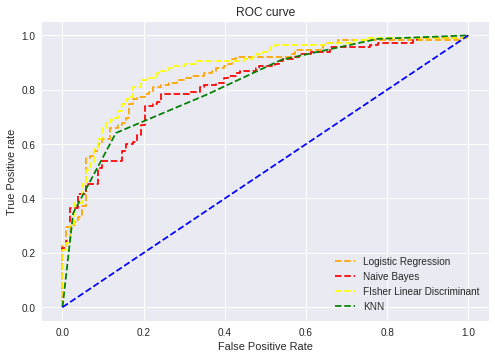

In [ ]:
#Fitting K-NN classifier to the training set
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)
#importing model from sklearn 
    
    #predict class
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
    
pred_prob1 = classifier.predict_proba(x_test)

arr_2d = np.reshape(y_test, (154, 1))
new_np = np.hstack((x_test,arr_2d))
finaltocsv= np.hstack((new_np,pred_prob1))
finaldf = pd.DataFrame(finaltocsv)
finaldf.to_csv("Dataset4-KNN-test-results.csv")

from sklearn.metrics import roc_curve

    # roc curve for models
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)

    # matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

    # plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='FIsher Linear Discriminant')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
plt.title('ROC curve')
    # x label
plt.xlabel('False Positive Rate')
    # y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test) 
y_pred

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [ ]:
#Creating the Confusion matrix
cm= confusion_matrix(y_test, y_pred)

In [ ]:
#finding accuracy
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("The Confusion Matrix is:\n ",cm)
target_names = ['Covid Negative', 'Covid Positive']
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 71.43%
The Confusion Matrix is:
  [[49 27]
 [17 61]]
                precision    recall  f1-score   support

Covid Negative       0.74      0.64      0.69        76
Covid Positive       0.69      0.78      0.73        78

      accuracy                           0.71       154
     macro avg       0.72      0.71      0.71       154
  weighted avg       0.72      0.71      0.71       154



In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier(scale_pos_weight = 0.9)
eval_set = [(x_train, y_train), (x_test, y_test)]
classifier.fit(x_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=False)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.9, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0])

In [ ]:
cm= confusion_matrix(y_test, y_pred)
#finding accuracy
accuracy = accuracy_score(y_test, y_pred)
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("The Confusion Matrix is:\n ",cm)
target_names = ['Covid Negative', 'Covid Positive']
print(classification_report(y_test, y_pred, target_names=target_names))
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)

Accuracy: 77.92%
The Confusion Matrix is:
  [[60 16]
 [18 60]]
                precision    recall  f1-score   support

Covid Negative       0.77      0.79      0.78        76
Covid Positive       0.79      0.77      0.78        78

      accuracy                           0.78       154
     macro avg       0.78      0.78      0.78       154
  weighted avg       0.78      0.78      0.78       154



In [ ]:
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
    
pred_prob1 = classifier.predict_proba(x_test)

from sklearn.metrics import roc_curve

    # roc curve for models
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)
import matplotlib.pyplot as plt
plt.style.use('seaborn')


0.8626855600539811



# New Section

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)



Accuracy: 76.62%
The Confusion Matrix is:
  [[63 13]
 [23 55]]
                precision    recall  f1-score   support

Covid Negative       0.73      0.83      0.78        76
Covid Positive       0.81      0.71      0.75        78

      accuracy                           0.77       154
     macro avg       0.77      0.77      0.77       154
  weighted avg       0.77      0.77      0.77       154



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8576248313090419


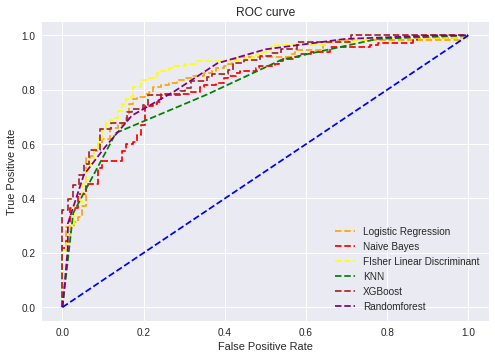

In [ ]:
eval_set = [(x_train, y_train), (x_test, y_test)]
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred
cm= confusion_matrix(y_test, y_pred)
#finding accuracy
accuracy = accuracy_score(y_test, y_pred)
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("The Confusion Matrix is:\n ",cm)
target_names = ['Covid Negative', 'Covid Positive']
print(classification_report(y_test, y_pred, target_names=target_names))
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
    
pred_prob1 = classifier.predict_proba(x_test)

arr_2d = np.reshape(y_test, (154, 1))
new_np = np.hstack((x_test,arr_2d))
finaltocsv= np.hstack((new_np,pred_prob1))
finaldf = pd.DataFrame(finaltocsv)
finaldf.to_csv("Dataset4-Random-Forest-Classifier-test-results.csv")

from sklearn.metrics import roc_curve

    # roc curve for models
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)
import matplotlib.pyplot as plt
plt.style.use('seaborn')

    # plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='FIsher Linear Discriminant')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='KNN')
plt.plot(fpr5, tpr5, linestyle='--',color='brown', label='XGBoost')
plt.plot(fpr6, tpr6, linestyle='--',color='purple', label='Randomforest')



plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
plt.title('ROC curve')
    # x label
plt.xlabel('False Positive Rate')
    # y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0, probability=True)
classifier.fit(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 77.27%
The Confusion Matrix is:
  [[59 17]
 [18 60]]
                precision    recall  f1-score   support

Covid Negative       0.77      0.78      0.77        76
Covid Positive       0.78      0.77      0.77        78

      accuracy                           0.77       154
     macro avg       0.77      0.77      0.77       154
  weighted avg       0.77      0.77      0.77       154

0.8343454790823212


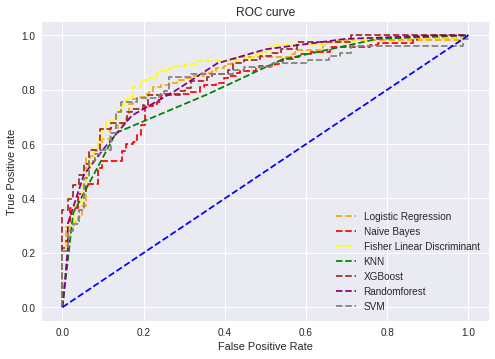

In [ ]:
eval_set = [(x_train, y_train), (x_test, y_test)]
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred
cm= confusion_matrix(y_test, y_pred)
#finding accuracy
accuracy = accuracy_score(y_test, y_pred)
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("The Confusion Matrix is:\n ",cm)
target_names = ['Covid Negative', 'Covid Positive']
print(classification_report(y_test, y_pred, target_names=target_names))
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
    
pred_prob1 = classifier.predict_proba(x_test)
arr_2d = np.reshape(y_test, (154, 1))
new_np = np.hstack((x_test,arr_2d))
finaltocsv= np.hstack((new_np,pred_prob1))
finaldf = pd.DataFrame(finaltocsv)
finaldf.to_csv("Dataset4-SVM-test-results.csv")

from sklearn.metrics import roc_curve

    # roc curve for models
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)
import matplotlib.pyplot as plt
plt.style.use('seaborn')

    # plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='Fisher Linear Discriminant')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='KNN')
plt.plot(fpr5, tpr5, linestyle='--',color='brown', label='XGBoost')
plt.plot(fpr6, tpr6, linestyle='--',color='purple', label='Randomforest')
plt.plot(fpr7, tpr7, linestyle='--',color='grey', label='SVM')


plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
plt.title('ROC curve')
    # x label
plt.xlabel('False Positive Rate')
    # y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
!pip3 install pandas_ml
!pip3 install scikit-learn==0.21
!pip3 install pandas==0.24.2

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
No handles with labels found to put in legend.


AUC Score is  0.8469594594594595 

CONFUSION MATRIX -
 Predicted  False  True  __all__
Actual                         
False         60    14       74
True          19    61       80
__all__       79    75      154 

population: 154
P: 80
N: 74
PositiveTest: 75
NegativeTest: 79
TP: 61
TN: 60
FP: 14
FN: 19
TPR: 0.7625
TNR: 0.8108108108108109
PPV: 0.8133333333333334
NPV: 0.759493670886076
FPR: 0.1891891891891892
FDR: 0.18666666666666668
FNR: 0.2375
ACC: 0.7857142857142857
F1_score: 0.7870967741935484
MCC: 0.5730688564591145
informedness: 0.5733108108108107
markedness: 0.5728270042194095
prevalence: 0.5194805194805194
LRP: 4.0303571428571425
LRN: 0.29291666666666666
DOR: 13.759398496240602
FOR: 0.24050632911392406


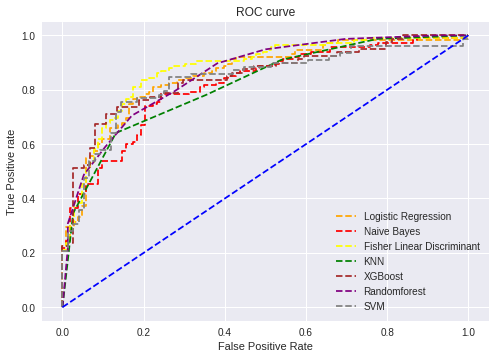

In [ ]:
from pandas_ml import ConfusionMatrix
dataset = pd.read_csv('/content/Dataset-4.csv')

total_neg_samples=sum(dataset['CoV-2']==0)
total_pos_samples=sum(dataset['CoV-2']==1)
scale_pos_weight = total_neg_samples / total_pos_samples

dataset.reset_index(inplace = True)

y = dataset[['CoV-2']]

X = dataset
X.drop(labels=None, axis=1, columns=['CoV-2','New_ID','Unnamed: 0','index'], level=None, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model = XGBClassifier(use_label_encoder=False, scale_pos_weight = scale_pos_weight)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=False)

y_pred = model.predict(X_test)
test_probs = model.predict_proba(X_test)
test_probs = test_probs[:, 1]
auc = roc_auc_score(y_test, test_probs)
print('AUC Score is ', (auc), '\n')
from sklearn.metrics import roc_curve
arr_2d = np.reshape(y_test, (154, 1))
new_np = np.hstack((X_test,arr_2d))
test_probs = np.reshape(test_probs,(154,1))
finaltocsv= np.hstack((new_np,test_probs))
finaldf = pd.DataFrame(finaltocsv)
finaldf.to_csv("Dataset4-XGBoost(Improved)-test-results.csv")
    # roc curve for models
fpr8, tpr8, thresh8 = roc_curve(y_test, test_probs, pos_label=1)
pred = pd.DataFrame(y_pred, columns=['CoV-2'])
test = pd.DataFrame(y_test, columns=['CoV-2'])
test.reset_index(inplace = True)
test.drop(labels=None, axis=1, columns=['index'], level=None, inplace=True)

CM = ConfusionMatrix(test['CoV-2'], pred['CoV-2'])

print('CONFUSION MATRIX -\n',(CM), '\n')
CM.print_stats()
import matplotlib.pyplot as plt
plt.style.use('seaborn')

    # plot roc curves
    # title
plt.title('ROC curve')
    # x label
plt.xlabel('False Positive Rate')
    # y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.style.use('seaborn')

    # plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='Fisher Linear Discriminant')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='KNN')
plt.plot(fpr8, tpr8, linestyle='--',color='brown', label='XGBoost')
plt.plot(fpr6, tpr6, linestyle='--',color='purple', label='Randomforest')
plt.plot(fpr7, tpr7, linestyle='--',color='grey', label='SVM')


plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
plt.title('ROC curve')
    # x label
plt.xlabel('False Positive Rate')
    # y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();